In [2]:
import numpy as np

In [3]:
import cv2
import matplotlib.pyplot as plt

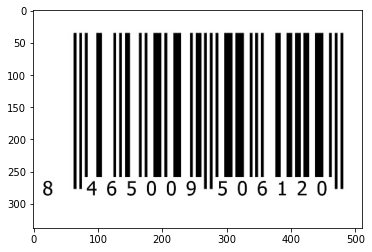

In [4]:
image = cv2.imread(r'C:\Users\aditioak\Desktop\Aditi\Projects\Barcode_Detection\images\barcode.jpg')
# show the image, provide window name first
plt.imshow(image)
plt.show()

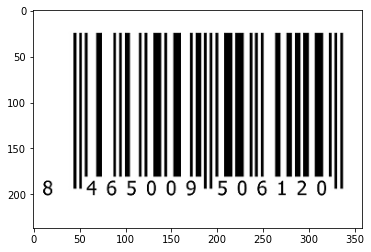

In [5]:
image = cv2.resize(image,None,fx=0.7, fy=0.7, interpolation = cv2.INTER_CUBIC)
plt.imshow(image)
plt.show()

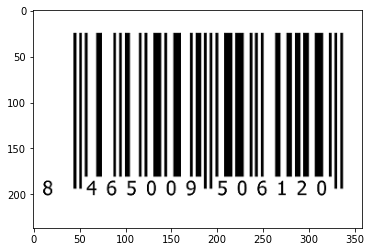

In [6]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap=plt.cm.gray)
plt.show()

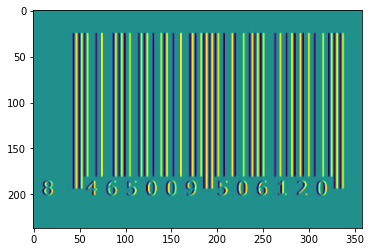

In [7]:
gradX = cv2.Sobel(gray, ddepth = cv2.CV_32F, dx = 1, dy = 0, ksize = -1)
gradY = cv2.Sobel(gray, ddepth = cv2.CV_32F, dx = 0, dy = 1, ksize = -1)
plt.imshow(gradX)
plt.show()

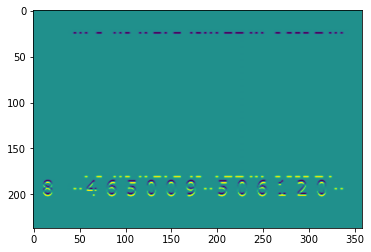

In [8]:
plt.imshow(gradY)
plt.show()

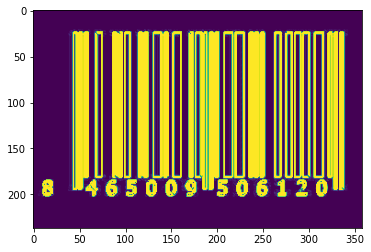

In [9]:
gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)
# gradient=np.sqrt(gradX**2 + gradY**2)
# gradient = cv2.convertScaleAbs(gradient)
plt.imshow(gradient)
plt.show()

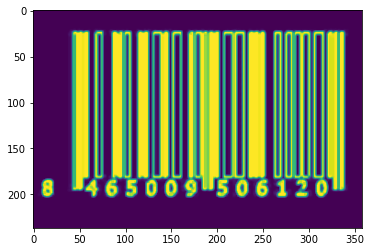

In [10]:
blurred = cv2.blur(gradient, (3, 3))
plt.imshow(blurred)
plt.show()

In [11]:
(_, thresh) = cv2.threshold(blurred, 225, 255, cv2.THRESH_BINARY)
cv2.resize(thresh,None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

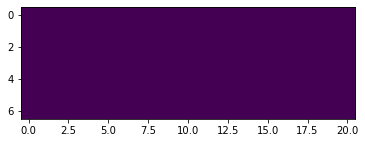

In [12]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 7))
plt.imshow(kernel)
plt.show()

In [13]:
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

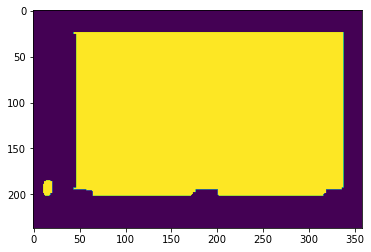

In [14]:
plt.imshow(closed)
plt.show()

In [15]:
cv2.resize(closed,None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [16]:
closed = cv2.erode(closed, None, iterations = 4)
closed = cv2.dilate(closed, None, iterations = 4)

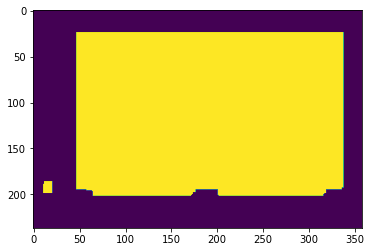

In [17]:
plt.imshow(closed)
plt.show()

In [18]:
cv2.resize(closed,None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [19]:
cnts,hierarchy = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[-2:]

In [20]:
c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
c1 = sorted(cnts, key = cv2.contourArea, reverse = True)[1]

In [21]:
rect = cv2.minAreaRect(c)
box = np.int0(cv2.boxPoints(rect))
rect1 = cv2.minAreaRect(c1)
box1 = np.int0(cv2.boxPoints(rect1))

In [22]:
cv2.drawContours(image, [box], -1, (0, 255, 0), 3)
cv2.drawContours(image, [box1], -1, (0, 255, 0), 3)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [23]:
image = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)

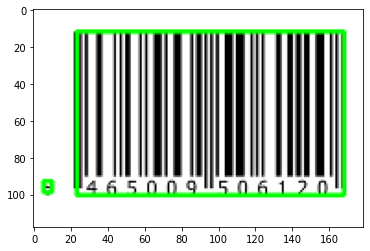

In [24]:
plt.imshow(image)
plt.show()